# Creating maps using OSM data

Before we get started, we need to import the necessary libraries.

In [2]:
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.0.1'

## Plot Aachen street network type
OpenStreetMap's data are useful to study urban form, networks, resilience and accessibility. [Street network](https://geoffboeing.com/2017/04/urban-form-analysis-openstreetmap/) data especially when holding these cities at the same scale providing spatial objectivity in comparing urban forms. Comparing the following city networks (all cities a part of the rheinisch revier) show essential differences and outline their uniqueness. ![Street_Network](./img/streetNetwork.png).  

For the first plot we need to define the dpi, the size (make sure it is not too big, or it may take some time to be plotted) and of course a place. These are essential inputs for the plot_figure_ground method. But the map is not just visualized as the output here but also saved as **aachen.png**. If parameters are unclear or unknown, have a look at the documentation, every parameter is described there.

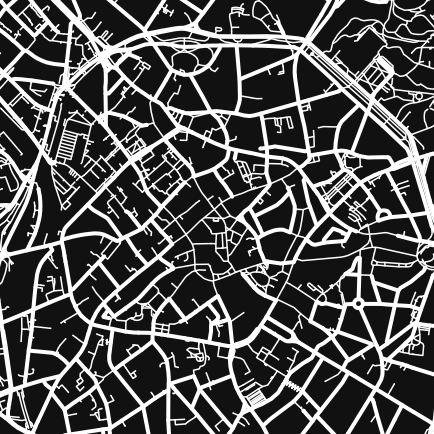

In [3]:
dpi=72
size=600
place = "Aachen, Germany"
fp = f"./aachen.png"
fig, ax = ox.plot_figure_ground(
    address=place,
    network_type="walk",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## Let us create a figure ground plan
Next step, creating a figure ground plan of Aachen. Therefore, we first have to set a centre point, a distance and a tag. The function creates a GeoDataFrame of OSM with a distance to N, S, W, E. The short form gdf stands for GeoDataFrame.

In [4]:
tags={"building":True}
point = (50.775593, 6.082478)
size=500
dist = 1000
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)


In [5]:
gdf.head()

C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:street,geometry,amenity,description,check_date,...,site_type,ramp:wheelchair,roof:type:height,contact:instagram,contact:twitter,air_conditioning,reservation,ways,type,scout
0,node/3197800212,3197800212,node,NaN,NaN,NaN,POINT (6.07872 50.77810),NaN,Lernraum im SuperC mit 268 Arbeitsplätzen. Zug...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/4962495741,4962495741,node,NaN,NaN,NaN,POINT (6.08596 50.78262),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/6712788490,6712788490,node,Aachen,20,Harscampstraße,POINT (6.09081 50.77384),place_of_worship,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/8068434,8068434,way,Aachen,38-40,Markt,"POLYGON ((6.08422 50.77600, 6.08410 50.77600, ...",townhall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/8600644,8600644,way,Aachen,44,Monheimsallee,"POLYGON ((6.09271 50.78156, 6.09274 50.78158, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The output shows, that in the column geometry polygons show up. The function plot_footprints takes these polygons to create the footprints of the buildings. The figure-ground diagrams are essential when representing the relationship between the build and unbuild space. The probably most known example is the **Nolli Map** of Rome.

C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


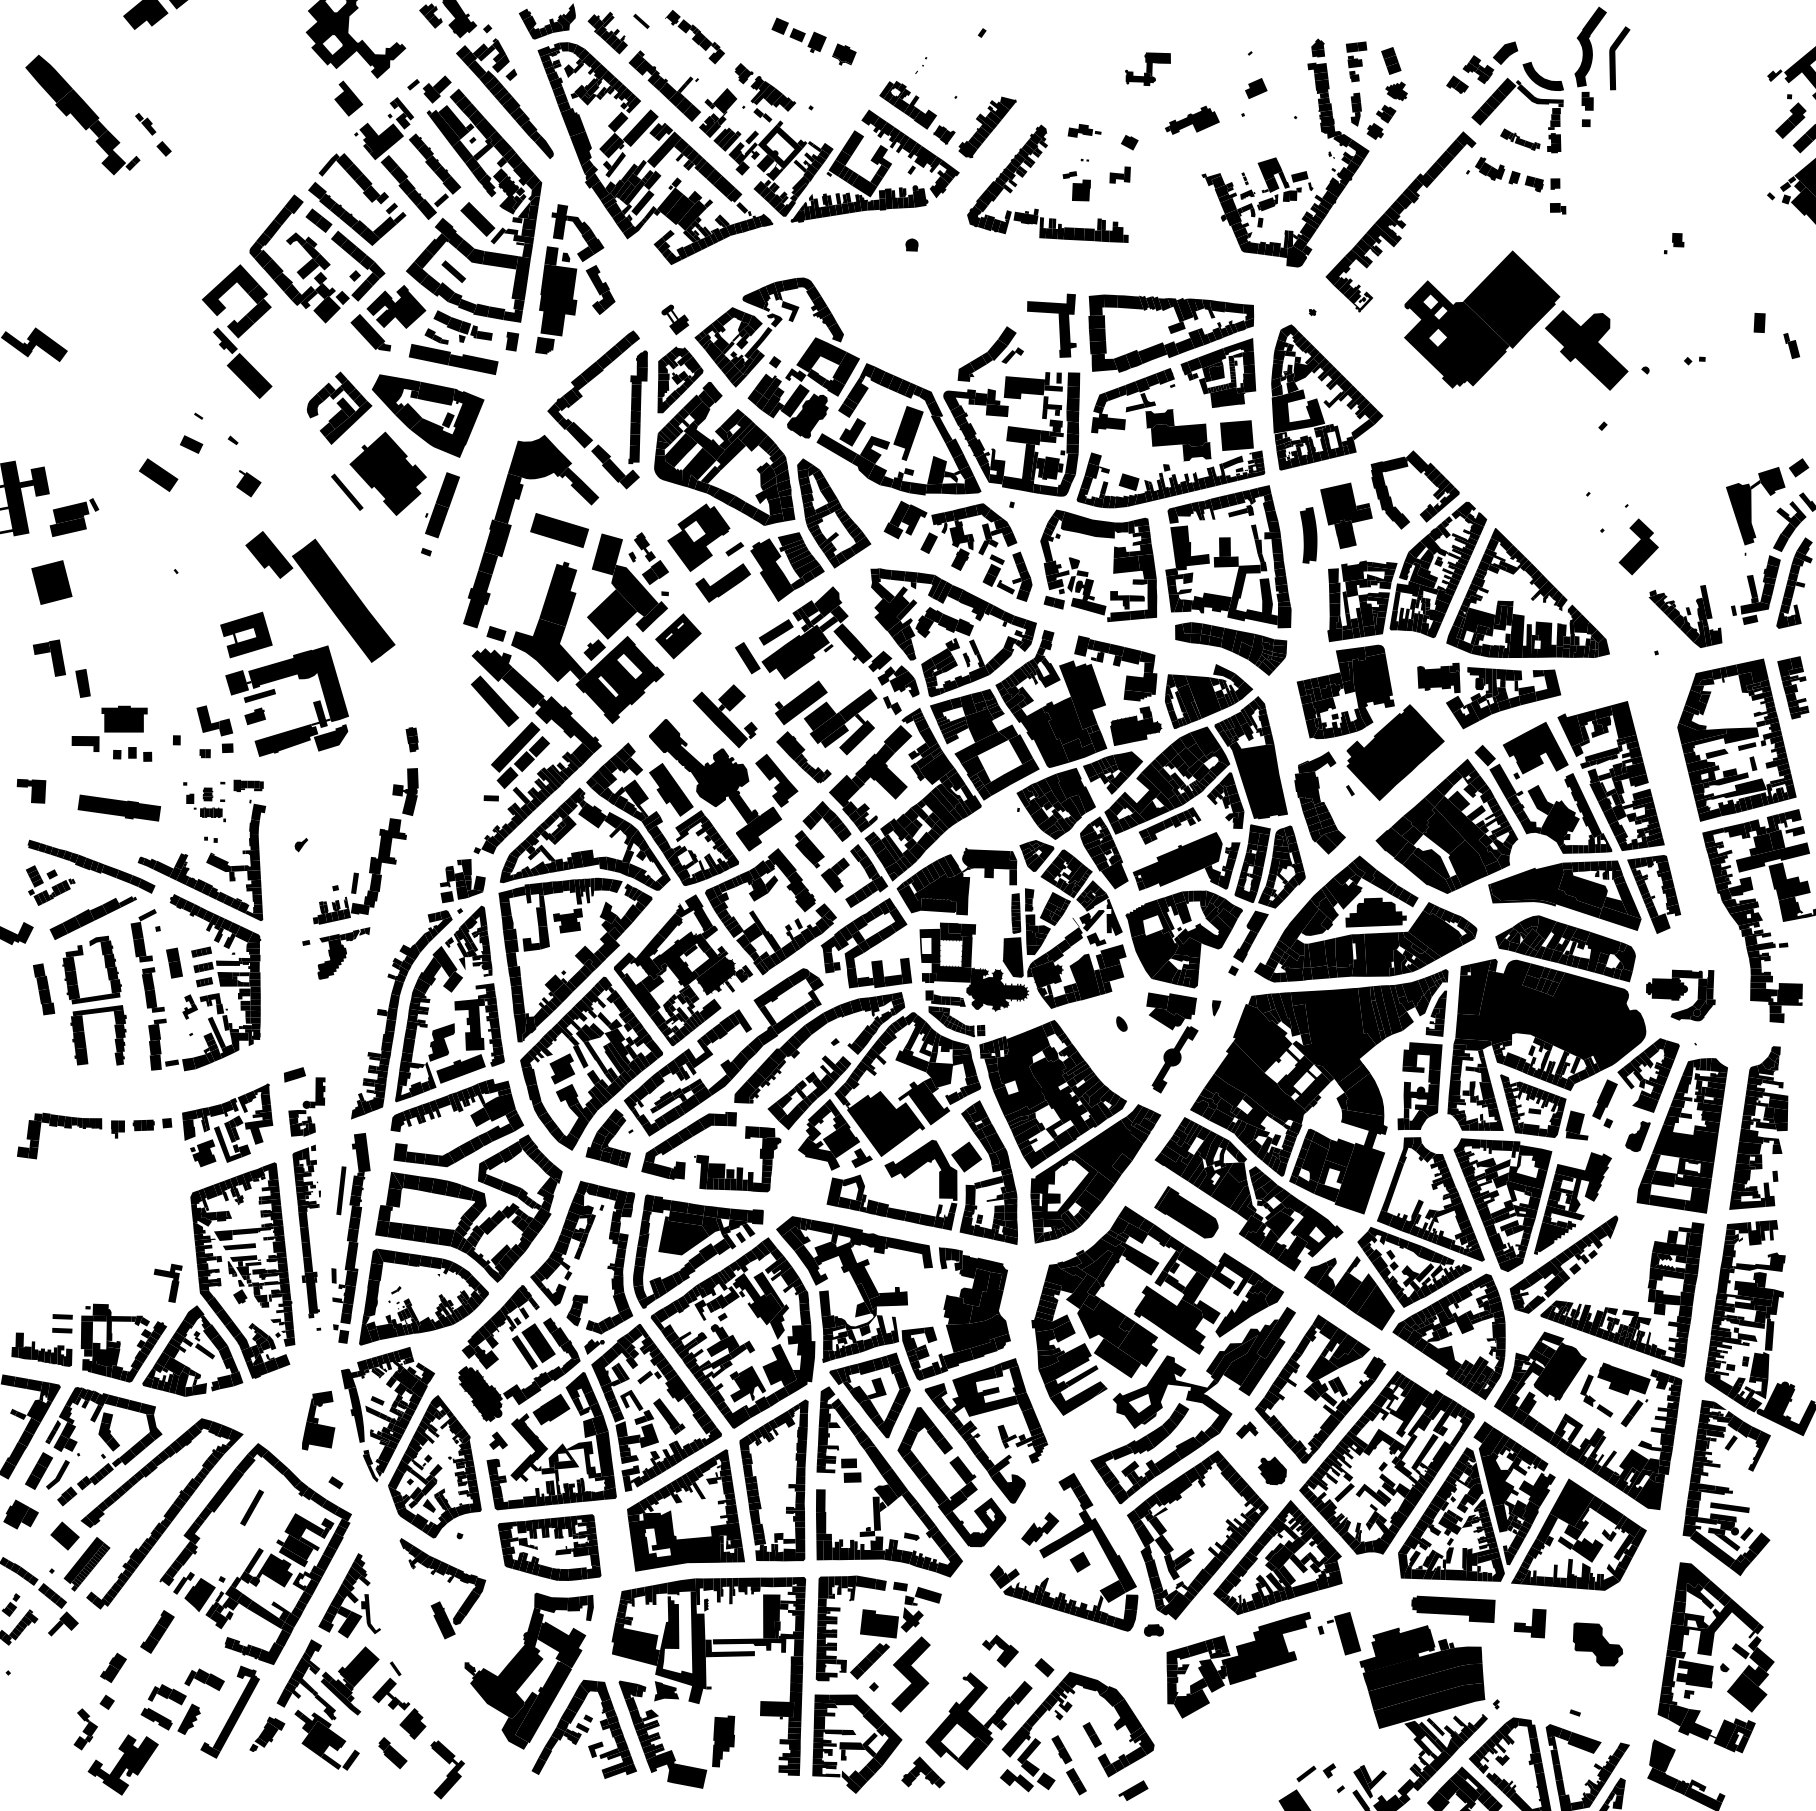

In [6]:
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./aachen_schwarzplan.png"
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="black",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

### Exercise
Create a figure ground plan for your hometown or a city by choice, choose a suitable size.

## Analysing information 
Information as GeoDataFrame are Next we do slice the GeoDataFrame for extracting information. Let us print the Table again and decide for what t

In [7]:
gdf.head()

C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:street,geometry,amenity,description,check_date,...,site_type,ramp:wheelchair,roof:type:height,contact:instagram,contact:twitter,air_conditioning,reservation,ways,type,scout
0,node/3197800212,3197800212,node,NaN,NaN,NaN,POINT (6.07872 50.77810),NaN,Lernraum im SuperC mit 268 Arbeitsplätzen. Zug...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/4962495741,4962495741,node,NaN,NaN,NaN,POINT (6.08596 50.78262),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/6712788490,6712788490,node,Aachen,20,Harscampstraße,POINT (6.09081 50.77384),place_of_worship,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/8068434,8068434,way,Aachen,38-40,Markt,"POLYGON ((6.08422 50.77600, 6.08410 50.77600, ...",townhall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/8600644,8600644,way,Aachen,44,Monheimsallee,"POLYGON ((6.09271 50.78156, 6.09274 50.78158, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
gdf['amenity'].unique()

C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([nan, 'place_of_worship', 'townhall', 'conference_centre',
       'parking', 'bus_station', 'library', 'bank', 'restaurant',
       'social_facility', 'pub', 'pharmacy', 'fast_food', 'brothel',
       'cafe', 'bar', 'driving_school', 'community_centre', 'school',
       'hospital', 'police', 'doctors', 'kindergarten', 'ice_cream',
       'clinic', 'post_office', 'cinema', 'college', 'theatre', 'dentist',
       'fuel', 'arts_centre', 'toilets', 'shelter', 'nightclub',
       'monastery'], dtype=object)

In [9]:
gdf[gdf ["amenity"] == "cafe"].head()

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:street,geometry,amenity,description,check_date,...,site_type,ramp:wheelchair,roof:type:height,contact:instagram,contact:twitter,air_conditioning,reservation,ways,type,scout
550,way/77626329,77626329,way,Aachen,13,Peterstraße,"POLYGON ((6.08880 50.77596, 6.08881 50.77595, ...",cafe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,way/77738927,77738927,way,Aachen,6,Rethelstraße,"POLYGON ((6.08500 50.77611, 6.08497 50.77608, ...",cafe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,way/79140422,79140422,way,Aachen,11,Krämerstraße,"POLYGON ((6.08438 50.77557, 6.08450 50.77558, ...",cafe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,way/79140918,79140918,way,Aachen,18-20,Büchel,"POLYGON ((6.08543 50.77582, 6.08547 50.77580, ...",cafe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,way/79512347,79512347,way,Aachen,17,Pontdriesch,"POLYGON ((6.08123 50.77960, 6.08126 50.77958, ...",cafe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
gdf['building'].unique()

C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['university', 'bunker', 'yes', 'government', 'church', 'cathedral',
       'parking', 'sports_centre', 'detached', 'commercial', 'service',
       'public', 'chapel', 'hotel', 'office', 'school', 'apartments',
       'garages', 'house', 'garage', 'retail', 'kiosk', 'industrial',
       'civic', 'mosque', 'dormitory', 'kindergarten', 'synagogue',
       'residential', 'hospital', 'roof', 'carport', 'train_station',
       'monastery', 'hut', 'greenhouse', 'warehouse', 'construction',
       'shed', 'college'], dtype=object)

<AxesSubplot:>

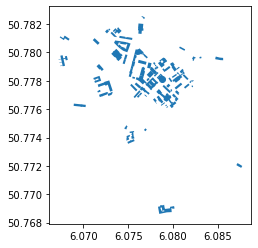

In [11]:
gdf[gdf['building'] == "university"].plot()

In [12]:
reiff = ox.geocode("reiff museum aachen")
hbf = ox.geocode("Aachen Hauptbahnhof")


C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
rdf = ox.geometries_from_point(reiff, tags={"building":True},dist=100)
rdf.head()


,unique_id,osmid,element_type,amenity,opening_hours,operator,wheelchair,geometry,note,name,...,wikipedia,building:use,height,layer,min_height,alt_name,ramp:wheelchair,ways,type,source
0,way/27523976,27523976,way,NaN,NaN,NaN,yes,"POLYGON ((6.07585 50.77811, 6.07589 50.77819, ...",NaN,Institut für Hochspannungstechnik | IFHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/30440687,30440687,way,NaN,NaN,NaN,yes,"POLYGON ((6.07981 50.77636, 6.07950 50.77662, ...",NaN,Ex-Kármán-Auditorium | z.Z. stillgelegt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/30440688,30440688,way,NaN,NaN,NaN,NaN,"POLYGON ((6.07839 50.77696, 6.07866 50.77674, ...",NaN,Philosophische Fakultät,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/30440696,30440696,way,NaN,NaN,NaN,NaN,"POLYGON ((6.07740 50.77812, 6.07717 50.77798, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/32322791,32322791,way,NaN,NaN,NaN,yes,"POLYGON ((6.07777 50.77668, 6.07795 50.77678, ...",NaN,Couvenhalle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


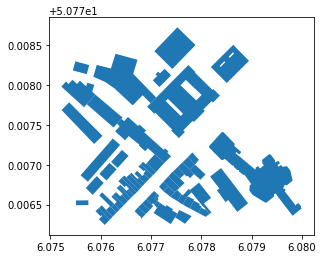

In [14]:
fig = rdf.plot()

## Let us work with graphs
Spatial graphs can be traceable to a mathematical concept. A mathematical graph is composed of **nodes** which are linked by **edges**. Therefore, nodes can represent geographic places with specific locations and edges represent connecting paths. The composition is needed to analyse structures, such as the following example of path calculation shows.

In [15]:
# attention, getting the whole of Aachen takes many minutes, we will get the inner city only
#G = ox.graph_from_place("Aachen, Germany", network_type="walk")
G = ox.graph_from_point(point, dist=500, network_type="bike")


C:\Users\kremer\Anaconda3\envs\p38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


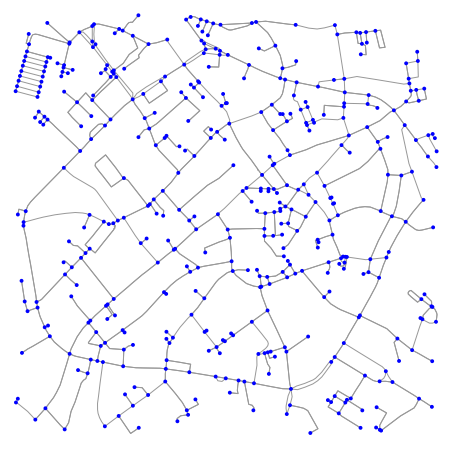

In [16]:
ax, fig = ox.plot_graph(G, node_color='b', node_zorder=3, bgcolor='#FFFFFF')

In the following we are going to plot the shortest path between a start and an end point. There is one issue the actual train station is not part of the map itself, so the closest point to the train station is chosen. If you pick two nodes, then the shortest path between those two can be found, using weight = "length". One-way streets are correctly handled. 

In [ ]:
start = ox.nearest_nodes(G, reiff[1], reiff[0])
dest  = ox.nearest_nodes(G, hbf[1], hbf[0])

The shortes_path() function comes from the NetworX library. If the weight parameter of this function is specified the Dijkstra's algorithm is used to find the optimal route. This algorithm belongs to the class of Greedy algorithms. In graph theory these are used to solve optimiztion problems such as finding the shortest path. 

In [ ]:
route = ox.shortest_path(G, start, dest)
ox.plot_graph_route(G, route)

## Saving graphs
Sometimes you need this picture printed as PNG or JPG or a more geo related file such as GeoPackage.

In [ ]:
ox.save_graph_geopackage(G, filepath="mynetwork.gpkg")

Other times you may need your graphs to be able to load in for example illustrator and therefore saved as **svg** file. When running the code below, a new file will show up in your file structure, called mynetwork.svg.

In [ ]:
ox.plot_graph_route(G, route, node_color='b', node_zorder=3, bgcolor='#FFFFFF', show=False, save=True, filepath='./mynetwork.svg')

### Exercise
Add another path, for example from the Aachen university hospital to the Aachen city hall. You are welcome to choose another path, but the map must be extended and for practise do not reuse Reiff and Hbf. Print both the existing and the new path in one map use different colours. Hint: Checkout the OSMnx documentation for functions such as plot_graph_route().  